In [ ]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#importing the dataset
data = pd.read_csv('f2.csv')
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


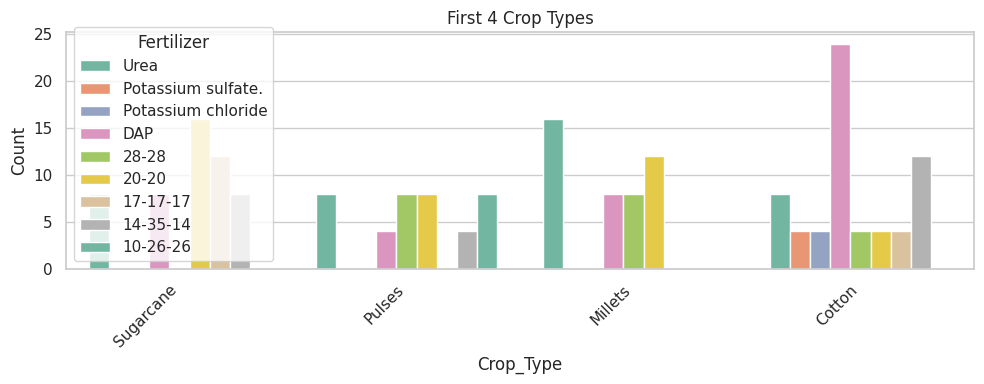

In [ ]:
#first 4 crop types
part1_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

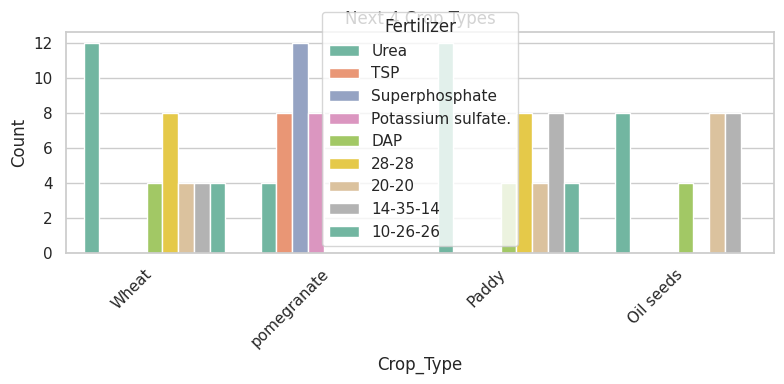

In [ ]:
# Split the data into three parts: next 4 crop types
part2_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[4:8])]

# Create the second countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part2_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Next 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

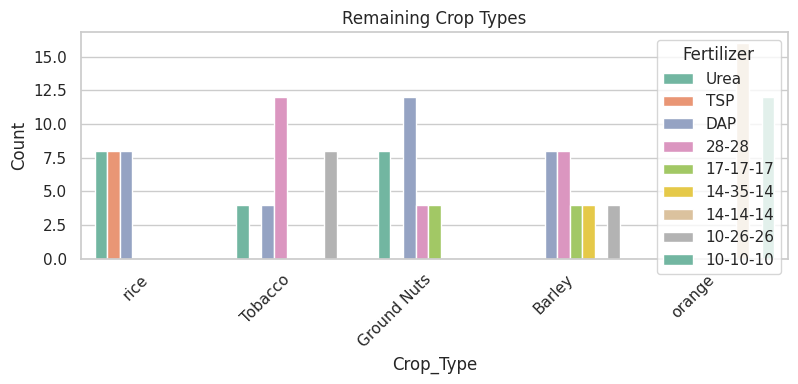

In [ ]:
# Split the data into three parts: remaining crop types
part3_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [ ]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type


,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [ ]:

# Use the exact column name here:
encode_crop = LabelEncoder()
data['Crop_Type'] = encode_crop.fit_transform(data['Crop_Type'])

Crop_Type = pd.DataFrame(zip(encode_crop.classes_, encode_crop.transform(encode_crop.classes_)),
                         columns=['Original', 'Encoded']).set_index('Original')

print(Crop_Type)


             Encoded
Original            
Barley             0
Cotton             1
Ground Nuts        2
Maize              3
Millets            4
Oil seeds          5
Paddy              6
Pulses             7
Sugarcane          8
Tobacco            9
Wheat             10
coffee            11
kidneybeans       12
orange            13
pomegranate       14
rice              15
watermelon        16


In [ ]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-10-10,0
10-26-26,1
14-14-14,2
14-35-14,3
15-15-15,4
17-17-17,5
20-20,6
28-28,7
DAP,8


In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (441, 8), y_train = (441,), x_test = (111, 8), y_test = (111,)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 213 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  441 non-null    int64
 1   Humidity     441 non-null    int64
 2   Moisture     441 non-null    int64
 3   Soil_Type    441 non-null    int64
 4   Crop_Type    441 non-null    int64
 5   Nitrogen     441 non-null    int64
 6   Potassium    441 non-null    int64
 7   Phosphorous  441 non-null    int64
dtypes: int64(8)
memory usage: 31.0 KB


In [ ]:
acc = [] # TEST
model = []
acc1=[] # TRIAN

In [ ]:
# predict on test set
y_test_pred = ds.predict(x_test)
test_acc = metrics.accuracy_score(y_test, y_test_pred)
acc.append(test_acc)
model.append('Decision Tree')

# predict on train set
y_train_pred = ds.predict(x_train)
train_acc = metrics.accuracy_score(y_train, y_train_pred)
acc1.append(train_acc)

print("Decision Tree's Accuracy is: ", test_acc*100, train_acc*100)

# classification report for test set predictions only
print(classification_report(y_test, y_test_pred))


Decision Tree's Accuracy is:  90.09009009009009 93.42403628117914
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.92      0.75      0.83        16
           9       0.00      0.00      0.00         1
          10       0.33      1.00      0.50         2
          11       0.00      0.00      0.00         3
          12       0.64      1.00      0.78         7
          13       1.00      0.94      0.97        18

    accuracy                           0.90       111
   macro avg       0.75      0.82      0.77       111
weighted avg  

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics

NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)

# Predict on test set
y_test_pred = NaiveBayes.predict(x_test)
test_acc = metrics.accuracy_score(y_test, y_test_pred)
acc.append(test_acc)

# Predict on train set
y_train_pred = NaiveBayes.predict(x_train)
train_acc = metrics.accuracy_score(y_train, y_train_pred)
acc1.append(train_acc)

model.append('Naive Bayes')

print("Naive Bayes's Accuracy is: ", test_acc, train_acc)
print(classification_report(y_test, y_test_pred))


Naive Bayes's Accuracy is:  0.9459459459459459 0.9138321995464853
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.88      0.88      0.88        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.60      1.00      0.75         3
          12       0.75      0.86      0.80         7
          13       1.00      0.83      0.91        18

    accuracy                           0.95       111
   macro avg       0.94      0.97      0.95       111
weighted avg  

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report

# Normalize features
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
X_test_norm = norm.transform(x_test)

# Train SVM
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm, y_train)

# Predict on test
y_test_pred = SVM.predict(X_test_norm)
test_acc = metrics.accuracy_score(y_test, y_test_pred)
acc.append(test_acc)

# Predict on train
y_train_pred = SVM.predict(X_train_norm)
train_acc = metrics.accuracy_score(y_train, y_train_pred)
acc1.append(train_acc)

model.append('SVM')

print("SVM's Accuracy is: ", test_acc, train_acc)
print(classification_report(y_test, y_test_pred))


SVM's Accuracy is:  0.990990990990991 0.9931972789115646
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         7
          13       1.00      0.94      0.97        18

    accuracy                           0.99       111
   macro avg       0.98      1.00      0.99       111
weighted avg       0.99

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train, y_train)

# Predict on test
y_test_pred = LogReg.predict(x_test)
test_acc = metrics.accuracy_score(y_test, y_test_pred)
acc.append(test_acc)

# Predict on train
y_train_pred = LogReg.predict(x_train)
train_acc = metrics.accuracy_score(y_train, y_train_pred)
acc1.append(train_acc)

model.append('Logistic Regression')

print("Logistic Regression's Accuracy is: ", test_acc, train_acc)
print(classification_report(y_test, y_test_pred))


Logistic Regression's Accuracy is:  0.7837837837837838 0.909297052154195
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00        10
           2       0.33      1.00      0.50         1
           3       0.90      0.75      0.82        12
           4       1.00      0.25      0.40         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.58      0.69      0.63        16
           9       0.00      0.00      0.00         1
          10       1.00      0.50      0.67         2
          11       0.50      0.33      0.40         3
          12       0.25      0.29      0.27         7
          13       0.73      0.89      0.80        18

    accuracy                           0.78       111
   macro avg       0.73      0.66      0.65       111
weighte

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train, y_train)

# Predict on test
y_test_pred = RF.predict(x_test)
test_acc = metrics.accuracy_score(y_test, y_test_pred)
acc.append(test_acc)

# Predict on train
y_train_pred = RF.predict(x_train)
train_acc = metrics.accuracy_score(y_train, y_train_pred)
acc1.append(train_acc)

model.append('RF')

print("RF's Accuracy is: ", test_acc, train_acc)
print(classification_report(y_test, y_test_pred))


RF's Accuracy is:  1.0 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        18

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(RF,data,data.Fertilizer,cv=5)
print("Cross-validation score of RF is:",score)
score = cross_val_score(LogReg,data,data.Fertilizer,cv=5)
print("Cross-validation score of LogReg is:",score)
score = cross_val_score(SVM,data,data.Fertilizer,cv=5)
print("Cross-validation score of SVM is:",score)
score = cross_val_score(NaiveBayes,data,data.Fertilizer,cv=5)
print("Cross-validation score of NaiveBayes is:",score)
score = cross_val_score(ds, data, data.Fertilizer,cv=5)
print("Cross-validation score of ds is:",score)

Cross-validation score of RF is: [1. 1. 1. 1. 1.]
Cross-validation score of LogReg is: [0.97297297 0.94594595 0.91818182 0.88181818 0.87272727]
Cross-validation score of SVM is: [0.96396396 0.92792793 0.91818182 0.88181818 0.98181818]
Cross-validation score of NaiveBayes is: [1. 1. 1. 1. 1.]
Cross-validation score of ds is: [1. 1. 1. 1. 1.]


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

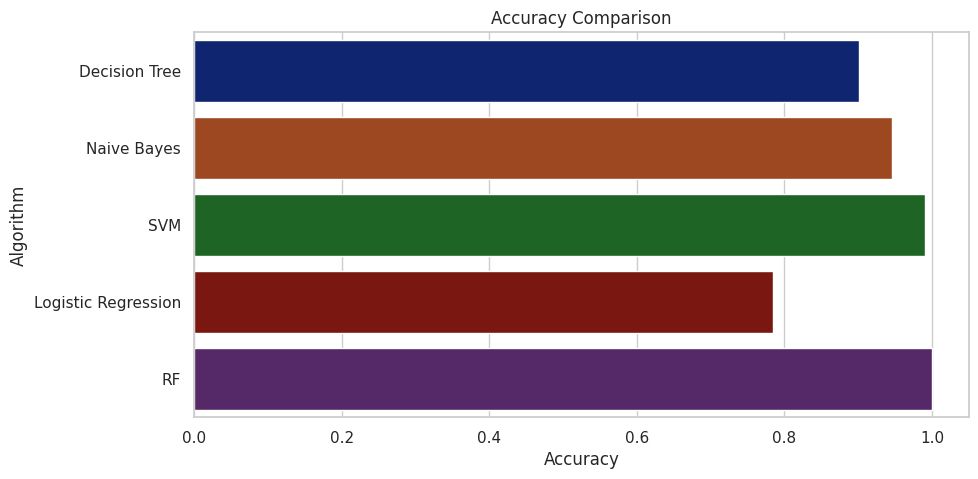

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import os

# --- Known classes ---
crop_classes = np.array(['Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets', 'Oil seeds', 'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat', 'coffee', 'kidneybeans', 'orange', 'pomegranate', 'rice', 'watermelon'])
soil_classes = np.array(['Black', 'Clayey', 'Loamy', 'Red', 'Sandy'])
fert_classes = np.array(['10-10-10', '10-26-26', '14-14-14', '14-35-14', '15-15-15', '17-17-17', '20-20', '28-28', 'DAP', 'Potassium chloride', 'Potassium sulfate.', 'Superphosphate', 'TSP', 'Urea'])

def check_labels(column_data, known_classes, column_name):
    unknown = set(column_data.unique()) - set(known_classes)
    if unknown:
        raise ValueError(f"Unknown labels found in '{column_name}': {unknown}")
    else:
        print(f"All labels in '{column_name}' are valid.")

# --- Load data ---
data = pd.read_csv('f2.csv')

# --- Check labels early to catch errors before encoding ---
check_labels(data['Crop_Type'], crop_classes, 'Crop_Type')
check_labels(data['Soil_Type'], soil_classes, 'Soil_Type')
check_labels(data['Fertilizer'], fert_classes, 'Fertilizer')

# --- Initialize LabelEncoders ---
le_crop = LabelEncoder()
le_crop.classes_ = crop_classes

le_soil = LabelEncoder()
le_soil.classes_ = soil_classes

le_fert = LabelEncoder()
le_fert.classes_ = fert_classes

# --- Encode categorical features ---
data['Crop_Type_enc'] = le_crop.transform(data['Crop_Type'])
data['Soil_Type_enc'] = le_soil.transform(data['Soil_Type'])

# --- Features and target ---
feature_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous', 'Soil_Type_enc', 'Crop_Type_enc'
]
X = data[feature_cols].values
y = le_fert.transform(data['Fertilizer'])

# --- Split dataset ---
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# --- Scale features ---
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# --- Train Random Forest ---
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train_scaled, y_train)

# --- Predict and evaluate ---
y_pred = RF.predict(x_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

unique_labels = np.unique(y_test)
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=le_fert.classes_[unique_labels]))

# --- Save model and encoders ---
os.makedirs('model', exist_ok=True)
joblib.dump(RF, 'model/fertilizer_model.pkl')
joblib.dump(scaler, 'model/fertilizer_scaler.pkl')
joblib.dump(le_crop, 'model/crop_label_encoder.pkl')
joblib.dump(le_soil, 'model/soil_label_encoder.pkl')
joblib.dump(le_fert, 'model/fert_label_encoder.pkl')

print("Model, scaler, and encoders saved in 'model/' folder.")


All labels in 'Crop_Type' are valid.
All labels in 'Soil_Type' are valid.
All labels in 'Fertilizer' are valid.
Test Accuracy: 1.0
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         4
          10-26-26       1.00      1.00      1.00         7
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00        14
          15-15-15       1.00      1.00      1.00         4
          17-17-17       1.00      1.00      1.00         7
             20-20       1.00      1.00      1.00        14
             28-28       1.00      1.00      1.00        17
               DAP       1.00      1.00      1.00        26
Potassium chloride       1.00      1.00      1.00         1
Potassium sulfate.       1.00      1.00      1.00         3
    Superphosphate       1.00      1.00      1.00         3
               TSP       1.00      1.00      1.00         7
              Urea       1.0

In [ ]:
import joblib

# Load the saved LabelEncoder from the .pkl file
le_fert = joblib.load('model/fert_label_encoder.pkl')

# Print the classes known to the LabelEncoder
print("Classes in the loaded LabelEncoder:")
print(le_fert.classes_)

le_crop = joblib.load('model/crop_label_encoder.pkl')
print(le_crop.classes_)


Classes in the loaded LabelEncoder:
['10-10-10' '10-26-26' '14-14-14' '14-35-14' '15-15-15' '17-17-17' '20-20'
 '28-28' 'DAP' 'Potassium chloride' 'Potassium sulfate.' 'Superphosphate'
 'TSP' 'Urea']
['Barley' 'Cotton' 'Ground Nuts' 'Maize' 'Millets' 'Oil seeds' 'Paddy'
 'Pulses' 'Sugarcane' 'Tobacco' 'Wheat' 'coffee' 'kidneybeans' 'orange'
 'pomegranate' 'rice' 'watermelon']


In [ ]:
from google.colab import files
files.download('model/fertilizer_model.pkl')
files.download('model/fertilizer_scaler.pkl')
files.download('model/soil_label_encoder.pkl')
files.download('model/crop_label_encoder.pkl')
files.download('model/fert_label_encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>